In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm

# Converting text file into dataframe

In [2]:
path = '/kaggle/input/crop-and-weed-detection-data-with-bounding-boxes/agri_data/data/'

In [3]:
data = [os.path.join(path,x) for x in os.listdir(path)]

In [4]:
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]

In [5]:
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

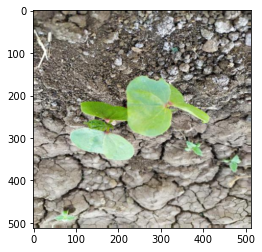

In [6]:
#checking our conversion is working or not
plt.imshow(cv2.cvtColor(cv2.imread(images[0]),cv2.COLOR_BGR2RGB))

In [7]:
df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i=0
for id in tqdm(images):
    label = open(id[:-5]+'.txt','r') 
    a = label.read()
    label.close()
    label = a.split('\n')
    cleaned_label = label[:-1]
    
    for name in cleaned_label:
        ind_label = name.split(' ')
        df.loc[i,'image_name'] = id[78:]
        df.loc[i,'object'] = int(ind_label[0])
        df.loc[i,'x_cen'] = float(ind_label[1])
        df.loc[i,'y_cen'] = float(ind_label[2])
        df.loc[i,'w'] = float(ind_label[3])
        df.loc[i,'h'] = float(ind_label[4])
        i += 1
    

100%|██████████| 1300/1300 [00:12<00:00, 100.79it/s]


In [8]:
df.head()

,image_name,object,x_cen,y_cen,w,h
0,agri_0_7209.jpeg,1,0.492188,0.504883,0.683594,0.419922
1,agri_0_6978.jpeg,0,0.514648,0.5,0.724609,0.859375
2,agri_0_9299.jpeg,0,0.491211,0.394531,0.892578,0.523438
3,agri_0_8085.jpeg,0,0.515625,0.530273,0.710938,0.580078
4,agri_0_8482.jpeg,0,0.445312,0.53125,0.785156,0.753906


# Converting dataframe into Pascal-voc format

In [9]:
#column name for pascal-voc dataframe
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

In [10]:
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):
    
    pascal_voc.loc[i,'filename'] = df.loc[i,'image_name']
    pascal_voc.loc[i,'width'] = 512
    pascal_voc.loc[i,'height']= 512  
    if df.loc[i,'object'] == 0:    
        pascal_voc.loc[i,'class'] = 'crop'
    else:
        pascal_voc.loc[i,'class'] = 'weed'
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*512)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*512) 
    

100%|██████████| 2072/2072 [00:04<00:00, 452.46it/s]


In [11]:
pascal_voc

,filename,width,height,class,xmin,ymin,xmax,ymax
0,agri_0_7209.jpeg,512,512,weed,77,151,427,366
1,agri_0_6978.jpeg,512,512,crop,77,36,448,476
2,agri_0_9299.jpeg,512,512,crop,23,67,480,336
3,agri_0_8085.jpeg,512,512,crop,81,122,446,419
4,agri_0_8482.jpeg,512,512,crop,26,79,428,464
...,...,...,...,...,...,...,...,...
2067,agri_0_6270.jpeg,512,512,crop,90,53,460,350
2068,agri_0_6523.jpeg,512,512,crop,93,127,411,418
2069,agri_0_270.jpeg,512,512,weed,54,124,405,476
2070,agri_0_2332.jpeg,512,512,crop,27,34,489,404


# Visualizing labels

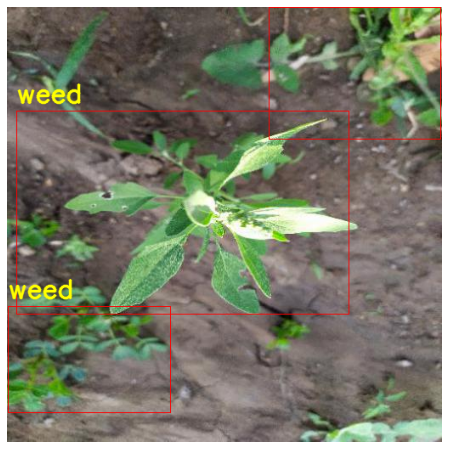

In [12]:
any_index_number = 55 #change this number for different images
test_img = cv2.cvtColor(cv2.imread(path+pascal_voc.loc[any_index_number,'filename']),cv2.COLOR_BGR2RGB)
test_df = pascal_voc[pascal_voc['filename']==pascal_voc.loc[any_index_number,'filename']].reset_index(drop=True)
for i in range(len(test_df)):
    
    rec = cv2.rectangle(test_img, (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']), (test_df.loc[i,'xmax'],test_df.loc[i,'ymax']), (255,0,0), 1, 1) 
    text = cv2.putText(rec, test_df.loc[i,'class'], (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']-10), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    
plt.figure(figsize=(8,8))    
plt.imshow(text)
plt.axis('off')
plt.show()

# Saving label file

In [13]:

pascal_voc.to_csv('pascal_voc_format.csv',index=False)